In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [221]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [222]:
call_service_df = pd.read_excel('../../Provided_Data/Calls for Service 2020 to 2022.xlsx')
print(call_service_df.shape)
call_service_df.head()


(748351, 5)


,Call Date,Call Time (HH:MM:SS),District,YRP,Call Type
0,20200101.0,14:49:10,1.0,11.0,ADVISED 911 CALL
1,20200107.0,03:14:28,2.0,22.0,TOW BYLAW & SPECIAL CONSTABLE
2,20200107.0,04:27:04,2.0,21.0,TOW BYLAW & SPECIAL CONSTABLE
3,20200107.0,04:47:35,1.0,11.0,ADVISED 911 CALL
4,20200107.0,05:02:39,5.0,52.0,ADVISED 911 CALL


In [223]:
# Remove entries where Call Type = ADVISED 911 CALL
call_service_df = call_service_df.loc[call_service_df['Call Type']!='ADVISED 911 CALL']
print(call_service_df.shape)
call_service_df.head()

(410260, 5)


,Call Date,Call Time (HH:MM:SS),District,YRP,Call Type
1,20200107.0,03:14:28,2.0,22.0,TOW BYLAW & SPECIAL CONSTABLE
2,20200107.0,04:27:04,2.0,21.0,TOW BYLAW & SPECIAL CONSTABLE
33,20200107.0,07:09:22,4.0,45.0,DRIVING HAZARD
47,20200107.0,08:50:58,4.0,42.0,TOW BYLAW & SPECIAL CONSTABLE
49,20200107.0,09:06:14,2.0,22.0,TOW BYLAW & SPECIAL CONSTABLE


In [224]:
# Convert the column to datetime format
call_service_df['date'] = pd.to_datetime(call_service_df['Call Date'], format='%Y%m%d')
# Convert the datetime column to the desired format
call_service_df['date'] = call_service_df['date'].dt.strftime('%Y-%m-%d')
call_service_df.head()

,Call Date,Call Time (HH:MM:SS),District,YRP,Call Type,date
1,20200107.0,03:14:28,2.0,22.0,TOW BYLAW & SPECIAL CONSTABLE,2020-01-07
2,20200107.0,04:27:04,2.0,21.0,TOW BYLAW & SPECIAL CONSTABLE,2020-01-07
33,20200107.0,07:09:22,4.0,45.0,DRIVING HAZARD,2020-01-07
47,20200107.0,08:50:58,4.0,42.0,TOW BYLAW & SPECIAL CONSTABLE,2020-01-07
49,20200107.0,09:06:14,2.0,22.0,TOW BYLAW & SPECIAL CONSTABLE,2020-01-07


In [225]:
# Get number of occurances each day
timeseries_data_df = call_service_df.groupby('date').size().reset_index(name='num_of_calls')
# Convert 'date' column to datetime type
timeseries_data_df['date'] = pd.to_datetime(timeseries_data_df['date'])

In [226]:
timeseries_data_df

,date,num_of_calls
0,2020-01-01,322
1,2020-01-02,333
2,2020-01-03,342
3,2020-01-04,309
4,2020-01-05,300
...,...,...
1091,2022-12-27,315
1092,2022-12-28,419
1093,2022-12-29,390
1094,2022-12-30,440


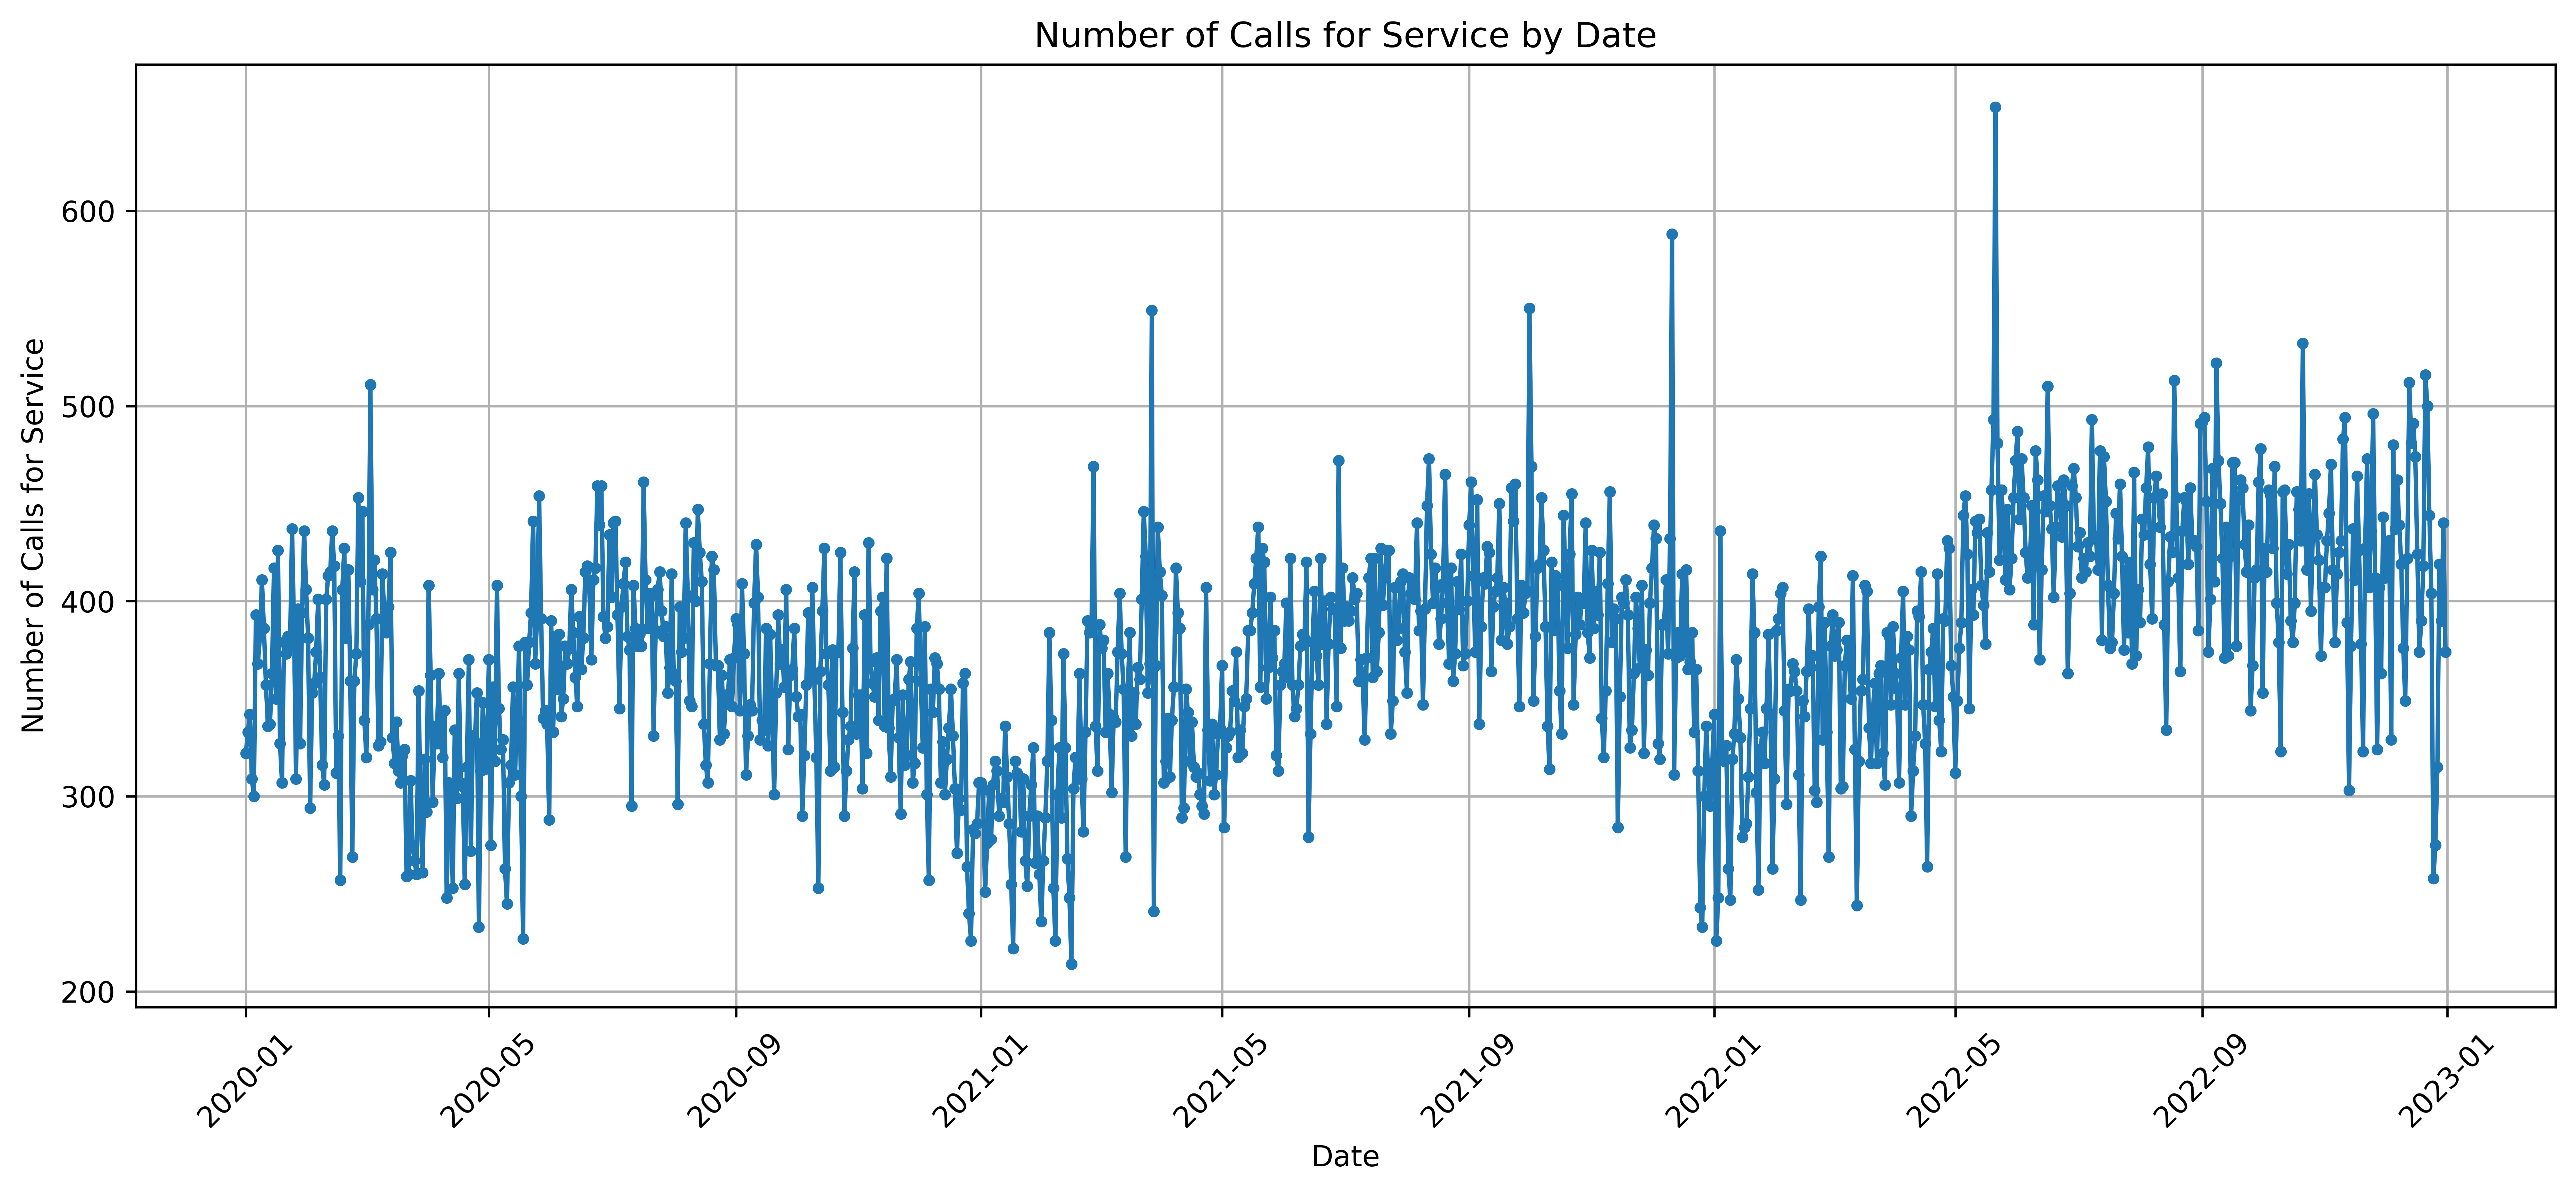

In [227]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(timeseries_data_df['date'], timeseries_data_df['num_of_calls'], marker='.')
plt.title('Number of Calls for Service by Date')
plt.xlabel('Date')
plt.ylabel('Number of Calls for Service')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [228]:
def load_query(path):
    with open(path) as file:
        return file.read()

query = load_query('service_calls_forecast_query.sql')
feature_df = pysqldf(query)
feature_df

,date,previous_day_calls,last_7_days_calls,last_30_days_calls,num_of_calls
0,2020-01-01,NaN,NaN,NaN,322
1,2020-01-02,322.0,322.0,322.0,333
2,2020-01-03,333.0,655.0,655.0,342
3,2020-01-04,342.0,997.0,997.0,309
4,2020-01-05,309.0,1306.0,1306.0,300
...,...,...,...,...,...
1091,2022-12-27,275.0,2397.0,12483.0,315
1092,2022-12-28,315.0,2196.0,12474.0,419
1093,2022-12-29,419.0,2115.0,12486.0,390
1094,2022-12-30,390.0,2061.0,12513.0,440


In [229]:
feature_df = feature_df[1:].copy()
feature_df['date'] = pd.to_datetime(feature_df.date, format='%Y-%m-%d')
feature_df

,date,previous_day_calls,last_7_days_calls,last_30_days_calls,num_of_calls
1,2020-01-02,322.0,322.0,322.0,333
2,2020-01-03,333.0,655.0,655.0,342
3,2020-01-04,342.0,997.0,997.0,309
4,2020-01-05,309.0,1306.0,1306.0,300
5,2020-01-06,300.0,1606.0,1606.0,393
...,...,...,...,...,...
1091,2022-12-27,275.0,2397.0,12483.0,315
1092,2022-12-28,315.0,2196.0,12474.0,419
1093,2022-12-29,419.0,2115.0,12486.0,390
1094,2022-12-30,390.0,2061.0,12513.0,440


In [230]:
# Define a function to check if a day is in a weekend
def is_weekend(weekday):
    if weekday in [5, 6]:
        return 1
    else:
        return 0

def get_season(month):
    if(month in [12, 1, 2]): # Winter
        return 4
    elif(month in [3, 4, 5]): # Spring
        return 1
    elif(month in [6, 7, 8]): # Summer
        return 2
    elif(month in [9, 10, 11]): # Fall
        return 3

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
    df['dayofweek'] = df['date'].dt.dayofweek

    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['weekofyear'] = df['weekofyear'].astype(int)

    df['season'] = df['month'].apply(get_season)
    df['season'] = df['season'].astype(int)

    df['is_weekend'] = df['dayofweek'].apply(is_weekend)

    X = df[['date', 'previous_day_calls', 'last_7_days_calls', 'last_30_days_calls', 'dayofweek','month','year',
            'dayofmonth','weekofyear', 'is_weekend', 'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(feature_df, label='num_of_calls')
features_and_target = pd.concat([X, y], axis=1)

In [231]:
features_and_target.corr()

,previous_day_calls,last_7_days_calls,last_30_days_calls,dayofweek,month,year,dayofmonth,weekofyear,is_weekend,season,num_of_calls
previous_day_calls,1.000000,0.693631,0.510825,0.240234,0.308330,3.121002e-01,-0.031248,0.277759,0.102191,-7.011621e-02,0.602872
last_7_days_calls,0.693631,1.000000,0.766268,0.022458,0.442884,4.026960e-01,0.015741,0.405931,0.058502,-1.177117e-01,0.591468
last_30_days_calls,0.510825,0.766268,1.000000,0.014008,0.554900,4.133999e-01,0.061692,0.538360,0.010690,-1.431123e-01,0.480629
dayofweek,0.240234,0.022458,0.014008,1.000000,-0.005513,1.119384e-03,-0.000636,-0.006985,0.790082,9.218887e-03,-0.141785
month,0.308330,0.442884,0.554900,-0.005513,1.000000,-3.245269e-04,0.007638,0.970757,-0.008757,2.080935e-01,0.299681
year,0.312100,0.402696,0.413400,0.001119,-0.000325,1.000000e+00,-0.003561,-0.011663,0.002476,1.592112e-13,0.313636
dayofmonth,-0.031248,0.015741,0.061692,-0.000636,0.007638,-3.561209e-03,1.000000,0.065695,0.002635,-9.732755e-03,-0.027396
weekofyear,0.277759,0.405931,0.538360,-0.006985,0.970757,-1.166287e-02,0.065695,1.000000,-0.005384,2.326473e-01,0.268468
is_weekend,0.102191,0.058502,0.010690,0.790082,-0.008757,2.475541e-03,0.002635,-0.005384,1.000000,2.717375e-03,-0.285689
season,-0.070116,-0.117712,-0.143112,0.009219,0.208093,1.592112e-13,-0.009733,0.232647,0.002717,1.000000e+00,-0.076590


In [232]:
# features = ['previous_day_crimes', 'last_7_days_crimes', 'last_30_days_crimes', 'dayofweek',
#        'month', 'dayofmonth', 'weekofyear', 'is_weekend', 'season']
features = ['previous_day_calls', 'last_7_days_calls', 'last_30_days_calls', 'dayofweek',
       'month', 'dayofmonth', 'weekofyear', 'is_weekend']
label = 'num_of_calls'
test_df = features_and_target[features_and_target['date'] >= '2022-06-01']
train_df = features_and_target[features_and_target['date'] < '2022-06-01']
X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]

In [233]:
# Get rows with null values
feature_df[feature_df.isnull().any(axis=1)]

,date,previous_day_calls,last_7_days_calls,last_30_days_calls,num_of_calls,dayofweek,month,year,dayofmonth,weekofyear,season,is_weekend


In [234]:
from sklearn.ensemble import RandomForestRegressor
# Train the model
model = RandomForestRegressor(n_estimators=500, max_depth=12)
model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# Feature Importance

In [235]:
# Get the feature importances
importances = model.feature_importances_
# Create a DataFrame for the feature importance table
feature_importance_table = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
# Sort the table by feature importance (descending order)
feature_importance_table = feature_importance_table.sort_values(by='Importance', ascending=False)
feature_importance_table

,Feature,Importance
0,previous_day_calls,0.365427
1,last_7_days_calls,0.177535
2,last_30_days_calls,0.139922
3,dayofweek,0.102098
6,weekofyear,0.073193
5,dayofmonth,0.069392
7,is_weekend,0.045935
4,month,0.026497


# Testing

In [236]:
predictions = model.predict(X_test)
test_df = test_df.reset_index().drop('index', axis=1)
test_df['y_pred'] = pd.Series(predictions)


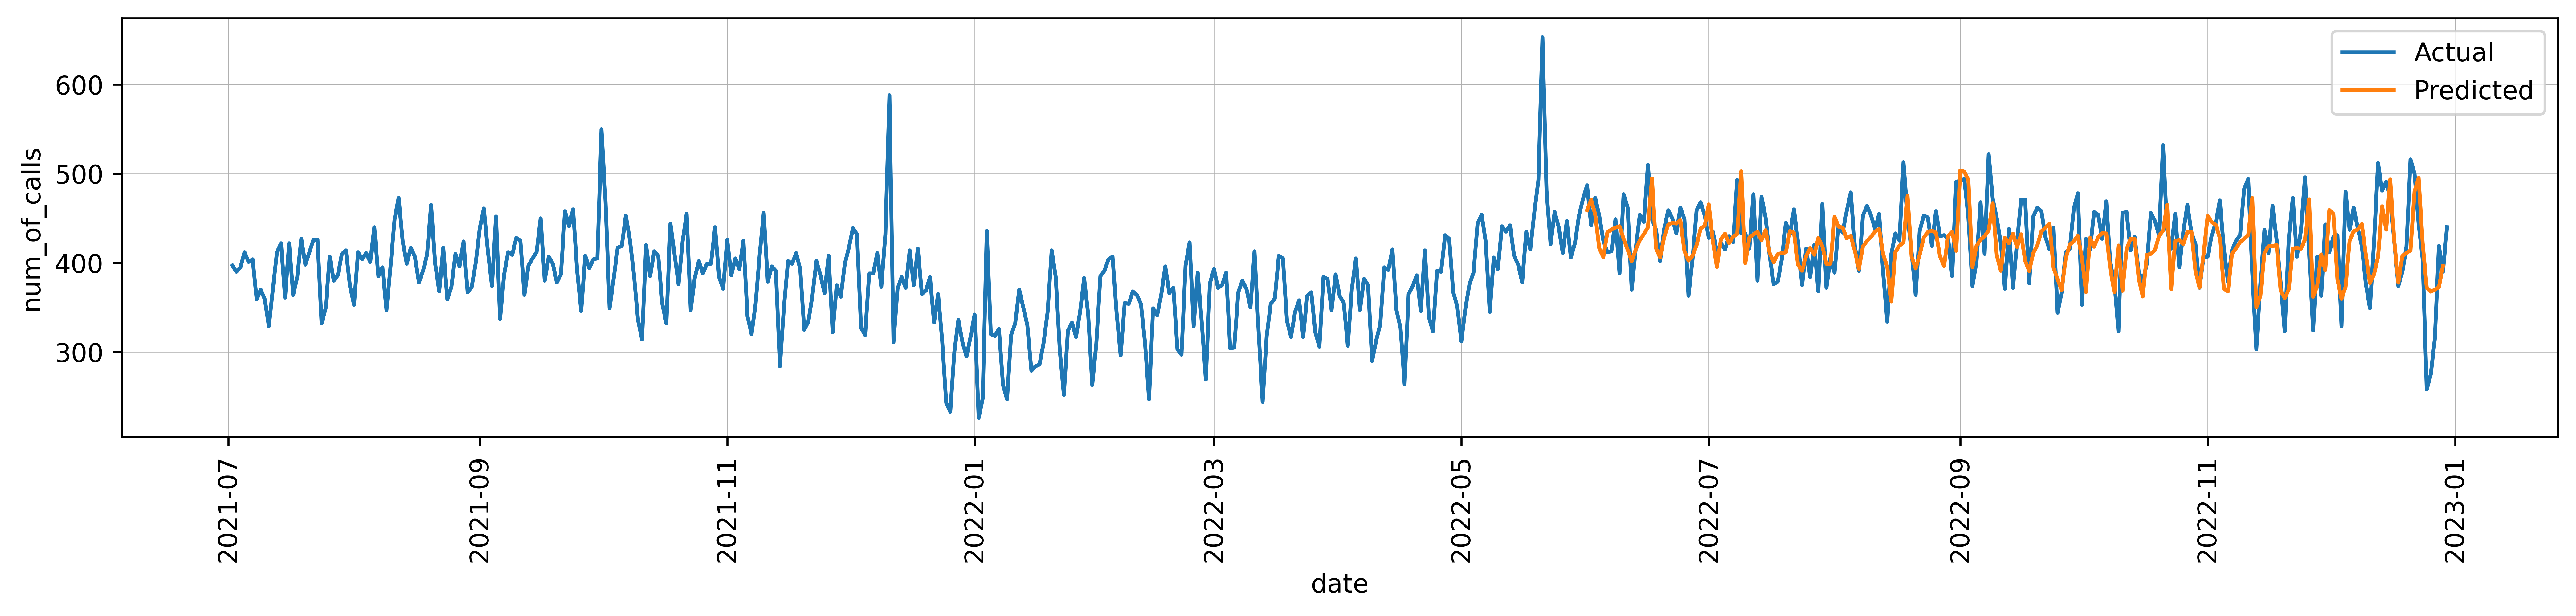

In [237]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':600})
fig, ax = plt.subplots()
sns.lineplot(data=features_and_target[len(features_and_target)//2 : len(features_and_target)-1], x='date', y=label, label='Actual')
sns.lineplot(data=test_df[: len(test_df)-2], x='date', y='y_pred', label='Predicted')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [238]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test_df[label], test_df['y_pred'])
rmse = mean_squared_error(test_df[label], test_df['y_pred'], squared=False)
r2 = r2_score(test_df[label], test_df['y_pred'])
print("MAE:", mae, "RMSE:", rmse, "R-Squared:", r2)

MAE: 30.60145223018487 RMSE: 38.82352382587552 R-Squared: 0.21815669559174888


In [242]:
# test_df.to_csv('Results/service_calls_forecast.csv')

# AutoML

In [239]:
# from flaml import AutoML
# automl = AutoML()
# automl_settings = {
#     "time_budget": 1000,  # total running time in seconds
#     "metric": 'r2',  # primary metric for validation
#     "task": 'regression',  # task type
#     "estimator_list": ['rf'],
# }
# automl.fit(X_train, y_train, **automl_settings)

In [240]:
# ''' retrieve best config'''
# print('Best hyperparmeter config:', automl.best_config)
# print('Best r2 on validation data: {0:.4g}'.format(1-automl.best_loss))
# print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

In [241]:
# automl.model.estimator